# Building a simple model in Prophet

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

In [3]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/co2-ppm-daily_csv.csv'

df = pd.read_csv(URL)
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [4]:
df.head(), df.tail()

(          ds       y
 0 1958-03-30  316.16
 1 1958-03-31  316.40
 2 1958-04-02  317.67
 3 1958-04-03  317.76
 4 1958-04-04  317.09,
               ds       y
 19382 2019-11-19  410.17
 19383 2019-11-20  410.05
 19384 2019-11-21  410.49
 19385 2019-11-22  410.48
 19386 2019-11-23  410.15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      19387 non-null  datetime64[ns]
 1   y       19387 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 303.0 KB


In [6]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.2003
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        112194    0.00410161        163280       1.809      0.1809      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        113222   0.000240432        153862      0.2052     0.02052      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        113920     0.0011444       90828.1      0.4725           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        114315   0.000445586       63620.3      0.2011           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        114549   0.000131925       16096.6           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha   

|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        114997   0.000214595       16809.1           1           1     1386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299        115007   1.85176e-05       6571.32           1           1     1501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399        115067    0.00034758       95090.8      0.8375      0.8375     1616   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499        115113   6.25954e-05       7378.15           1           1     1739   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599        115122   0.000117213       5147.27      0.7232      0.7232     1846   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        115125   6.10381e-05       2

In [7]:
future = model.make_future_dataframe(periods=365 * 10)
forecast = model.predict(future)

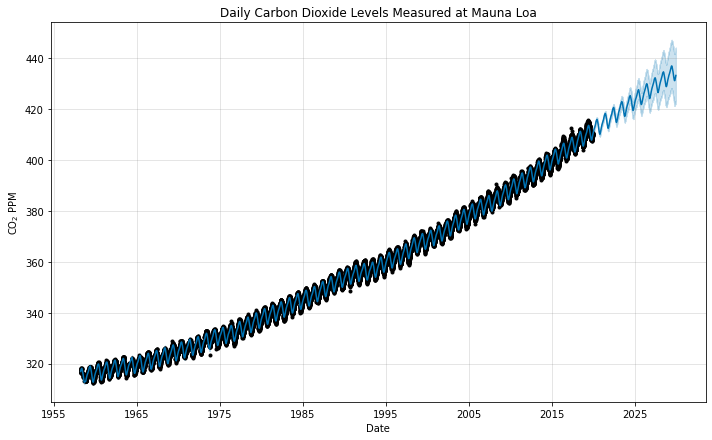

In [8]:
fig = model.plot(forecast, xlabel='Date', ylabel='CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

# Interpreting the forecast DataFrame

In [9]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.917252,314.919611,314.924329
yhat_lower,316.025662,316.074544,316.191512
yhat_upper,317.78764,317.786414,317.913725
trend_lower,314.917252,314.919611,314.924329
trend_upper,314.917252,314.919611,314.924329
additive_terms,1.985452,2.01539,2.118505
additive_terms_lower,1.985452,2.01539,2.118505
additive_terms_upper,1.985452,2.01539,2.118505
weekly,0.00323,-0.010834,0.003454


`yhat`: Final predicted value; a combination of `trend`, `multiplicative_terms`, and `additive_terms`


In [10]:
314.917252	+ 1.985452

316.902704

# Understanding components plots

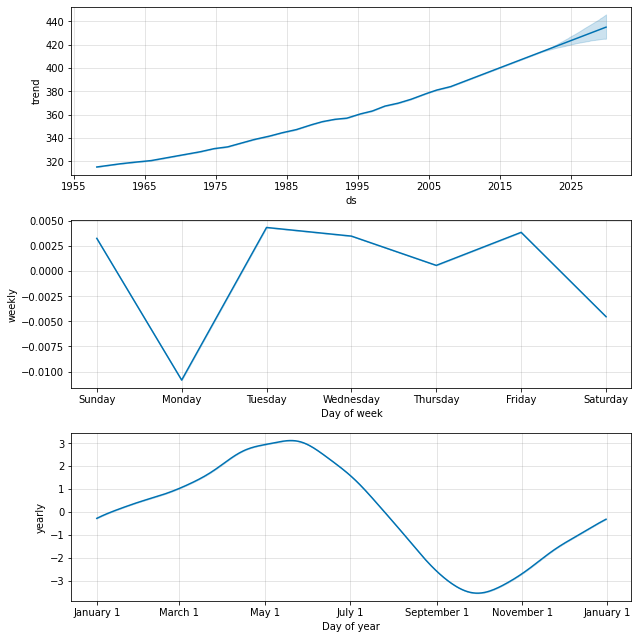

In [11]:
fig2 = model.plot_components(forecast)
plt.show()